
# Task 1: Iris Flower Classification With Machine Learning
# Ansil naseem


# Problem Statement
The primary objective of this project is to develop a robust machine learning model for the classification of Iris flowers based on their distinct features. The dataset in use comprises information regarding the sepal length, sepal width, petal length, and petal width of Iris flowers, categorized into three classes: Iris setosa, Iris versicolor, and Iris virginica. The dataset encompasses 150 instances, with 50 instances for each of the three classes. Notably, one class (Iris setosa) is linearly separable from the other two classes, while the latter two (Iris versicolor and Iris virginica) are not linearly separable from each other.

Iris Flower Classification Dataset Categories:

## Iris setosa
## Iris versicolor
## Iris virginica


The dataset encompasses 150 instances, with 50 instances for each of the three classes. Notably, one class (Iris setosa) is linearly separable from the other two classes, while the latter two (Iris versicolor and Iris virginica) are not linearly separable from each other.

Key Objectives:

Explore and comprehend the Iris dataset, investigating feature distributions and ensuring data integrity.
Preprocess the data, addressing any missing values and encoding categorical variables if necessary.
Conduct exploratory data analysis (EDA) to gain insights into the relationships between different features and the target variable (species).
Develop and train machine learning models, including Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and Support Vector Machine (SVM), for accurate classification of Iris flowers.
Evaluate the performance of each model using appropriate metrics such as accuracy, precision, recall, and F1 score.
Compare the models to identify the most effective approach for classifying Iris flowers.
Fine-tune the selected model for optimal performance using hyperparameter tuning techniques.
Present the findings, including model comparisons and insights derived from the analysis.
This project aims to contribute to the domain of Iris flower classification, providing a reliable tool for accurately categorizing Iris flowers based on their distinguishing features

## Import libraries <a class="anchor" id="1"></a>


The first step in building the model is to import the necessary libraries.

In [1]:
import numpy as np  # Importing NumPy library for numerical operations
import pandas as pd  # Importing Pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Importing Matplotlib for data visualization
import seaborn as sns  # Importing Seaborn for statistical data visualization
%matplotlib inline  

Loading the dataset into the notebook

In [2]:
import os
os.getcwd()

'c:\\Users\\ansil\\Dropbox\\PC\\Documents\\ProgramingProjects\\Oasis-internship\\OIBSIP-main\\Task1_Iris Flower Classification'

In [3]:

df = pd.read_csv('dataset\iris.csv')

## To display top five data of the dataset <a class="anchor" id="3"></a>

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## To display bottom five data of the dataset <a class="anchor" id="3"></a>

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


## Converting class labels into numerical form

In [6]:


from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Species']=le.fit_transform(df['Species'])
df["Species"]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

## To check tuple representing the dimensions (number of rows, number of columns) of the DataFrame<a class="anchor" id="4.5"></a>

In [7]:
df.shape

(150, 6)

## Display the summary of the dataset it includes the information of datatypes and the usage of memory,index and non-null values<a class="anchor" id="4.5"></a>

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [9]:
df.info(memory_usage=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int32  
dtypes: float64(4), int32(1), int64(1)

## Display the column labels (names) <a class="anchor" id="4.5"></a>

In [10]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## Statistical Descriptive Analysis

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


## EXPLORATORY DATA ANALYSIS

## 1. Summary statistics of numerical columns

In [12]:
df.describe()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


## 2. Show the count of missing values for each column.<a class="anchor" id="4"></a>


In [13]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## 3. Display the number of unique values for each column.<a class="anchor" id="4"></a>


In [14]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

## 4. Compute the pairwise correlation of columns, excluding NA/null values.<a class="anchor" id="4"></a>

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_df.corr()  # Calculate the correlation matrix for numeric columns
numeric_df.corr() # Display the correlation matrix

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## 5. Show the distribution of classes in the 'Species' column.

In [16]:
df['Species'].value_counts()


Species
0    50
1    50
2    50
Name: count, dtype: int64

## 6. Visualize the distribution of numerical features using box plots.

<Axes: >

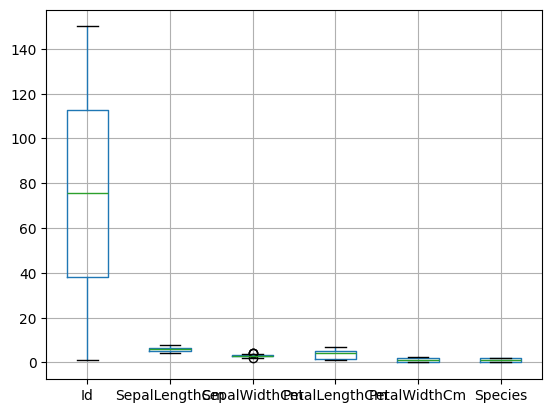

In [17]:
df.boxplot()


## 7. Compute descriptive statistics for each species separately.

In [18]:
df.groupby('Species').describe()


Id                                                        \
        count   mean       std    min     25%    50%     75%    max   
Species                                                               
0        50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
1        50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
2        50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

        SepalLengthCm         ... PetalLengthCm      PetalWidthCm         \
                count   mean  ...           75%  max        count   mean   
Species                       ...                                          
0                50.0  5.006  ...         1.575  1.9         50.0  0.244   
1                50.0  5.936  ...         4.600  5.1         50.0  1.326   
2                50.0  6.588  ...         5.875  6.9         50.0  2.026   

                                            
              std  min  25%  50%  75%  max  
Species                                     
0        0.107210  0.1  0.2  0.2  0.3  0.6  
1        0.197753  1.0  1.2  1.3  1.5  1.8  
2        0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 40 columns]

## 8. Calculate the mean sepal and petal dimensions for each species.

In [19]:
df.groupby('Species')[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].mean()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
0,5.006,3.418,1.464,0.244
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


## 9. Determine the standard deviation of petal width for each species.

In [20]:
df.groupby('Species')['PetalWidthCm'].std()


Species
0    0.107210
1    0.197753
2    0.274650
Name: PetalWidthCm, dtype: float64

## 10. Compute quantiles (e.g., 25th, 50th, and 75th percentiles) for sepal length.

In [21]:
df['SepalLengthCm'].quantile([0.25, 0.5, 0.75])


0.25    5.1
0.50    5.8
0.75    6.4
Name: SepalLengthCm, dtype: float64

## UNIVARIATE ANALYSIS

## 1. What is the distribution of Sepal Length in the dataset?

<Axes: >

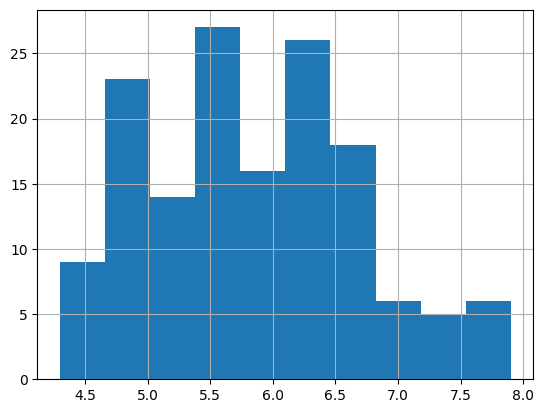

In [22]:
df['SepalLengthCm'].hist()


## 2. How does Sepal Width vary across different classes of iris flowers?

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

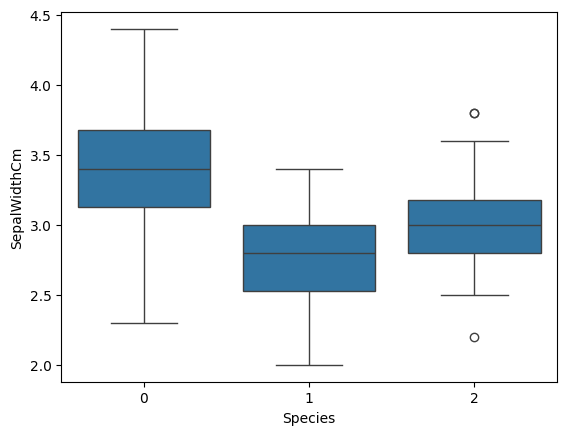

In [23]:
sns.boxplot(x='Species', y='SepalWidthCm', data=df)


## 3. What is the distribution of Petal Length for each species?

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

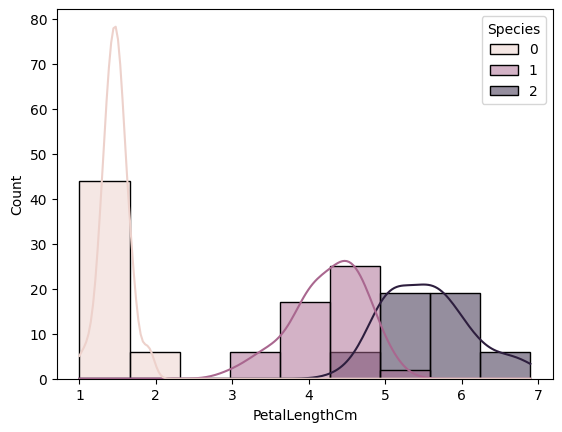

In [24]:
sns.histplot(data=df, x='PetalLengthCm', hue='Species', kde=True)


## 4. How is Petal Width distributed among different species?

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

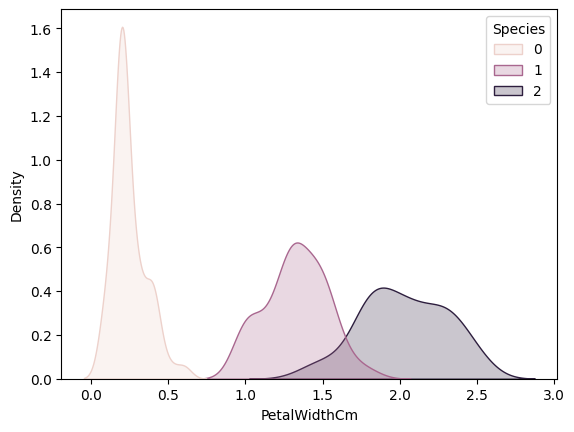

In [25]:
sns.kdeplot(data=df, x='PetalWidthCm', hue='Species', fill=True)


## 5. What is the count of each species in the dataset?

In [26]:
df['Species'].value_counts()


Species
0    50
1    50
2    50
Name: count, dtype: int64

## 6. Display a box plot for Sepal Length, highlighting any potential outliers.

<Axes: xlabel='SepalLengthCm'>

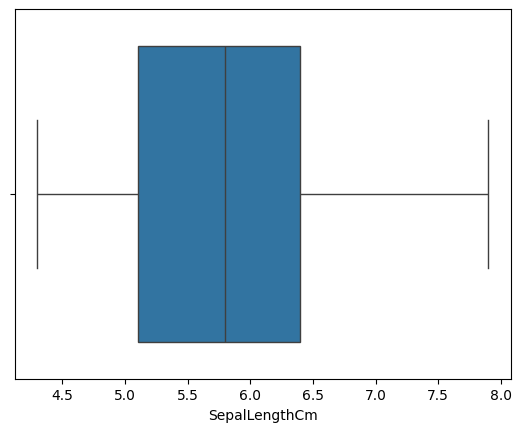

In [27]:
sns.boxplot(x=df['SepalLengthCm'])


## 7. What is the mean Sepal Width for each species?

In [28]:
df.groupby('Species')['SepalWidthCm'].mean()


Species
0    3.418
1    2.770
2    2.974
Name: SepalWidthCm, dtype: float64

## 8. How does the distribution of Petal Length differ among the three species?

<Axes: xlabel='Species', ylabel='PetalLengthCm'>

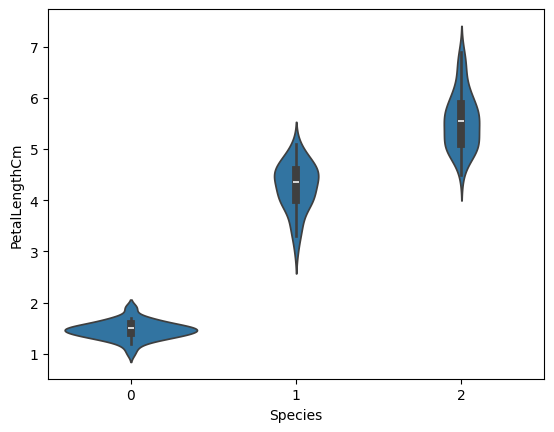

In [29]:
sns.violinplot(x='Species', y='PetalLengthCm', data=df)


## 9. Explore the distribution of Sepal Length using a kernel density plot.

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

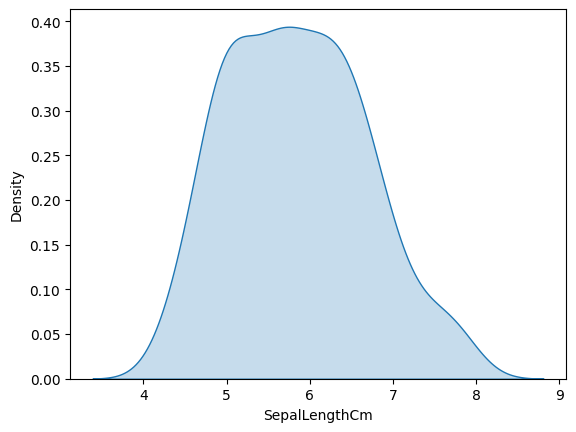

In [30]:
sns.kdeplot(data=df, x='SepalLengthCm', fill=True)


## 10. What is the standard deviation of Petal Width across all samples?

In [31]:
df['PetalWidthCm'].std()


0.7631607417008411

## BIVARIATE ANALYSIS

## 1. How does Sepal Length vary with Sepal Width for each species?

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

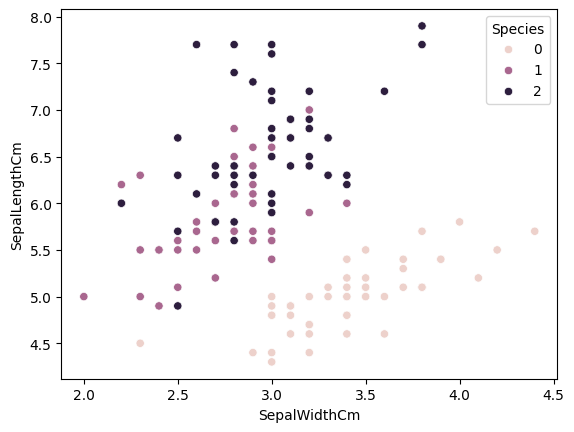

In [32]:
sns.scatterplot(x='SepalWidthCm', y='SepalLengthCm', hue='Species', data=df)


## 2. What is the relationship between Sepal Length and Petal Length across all samples?

<Axes: xlabel='SepalLengthCm', ylabel='PetalLengthCm'>

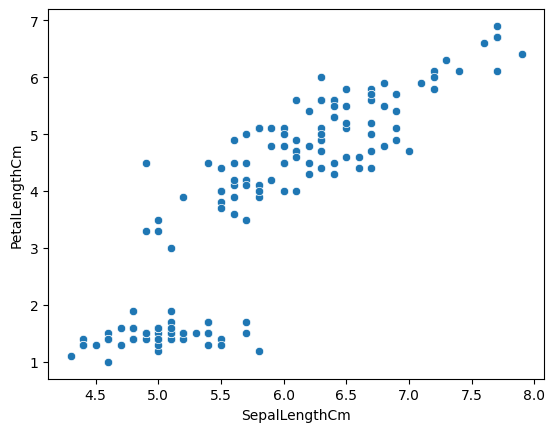

In [33]:
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=df)


## 3. How does Sepal Width relate to Petal Width for each species?

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

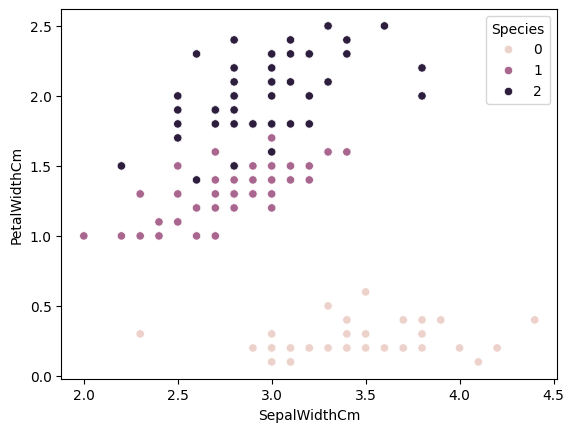

In [34]:
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)


## 4. Explore the correlation between Petal Length and Petal Width across all samples.

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

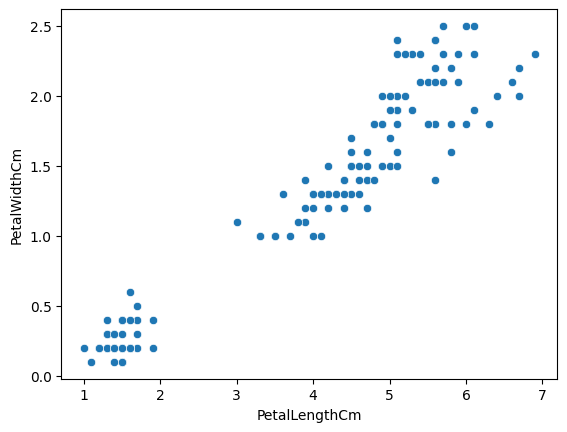

In [35]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', data=df)


## 5. Is there a correlation between Sepal Length and Petal Length for different species?

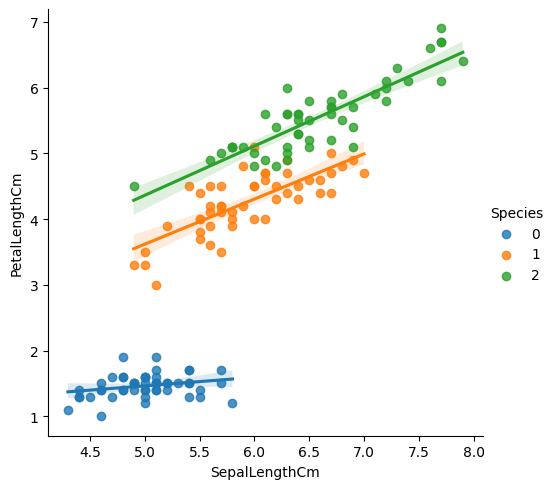

In [36]:
sns.lmplot(x='SepalLengthCm', y='PetalLengthCm', hue='Species', data=df)


## 6. Investigate the relationship between Sepal Width and Petal Width for each species.

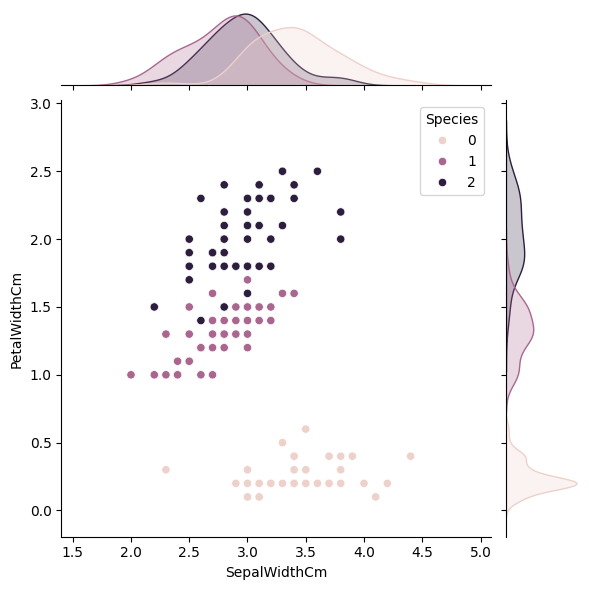

In [37]:
sns.jointplot(x='SepalWidthCm', y='PetalWidthCm', hue='Species', data=df)


## 7. Compare Sepal Length and Petal Width using a pairplot, distinguishing species.

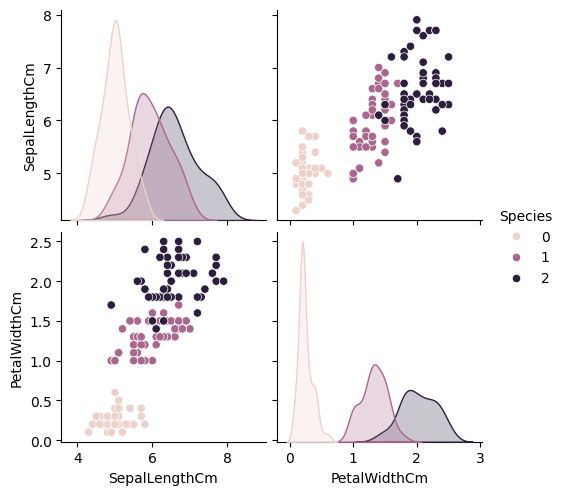

In [38]:
sns.pairplot(data=df, hue='Species', vars=['SepalLengthCm', 'PetalWidthCm'])


## 8.  Explore the correlation between Sepal Length and Sepal Width, differentiating by species.

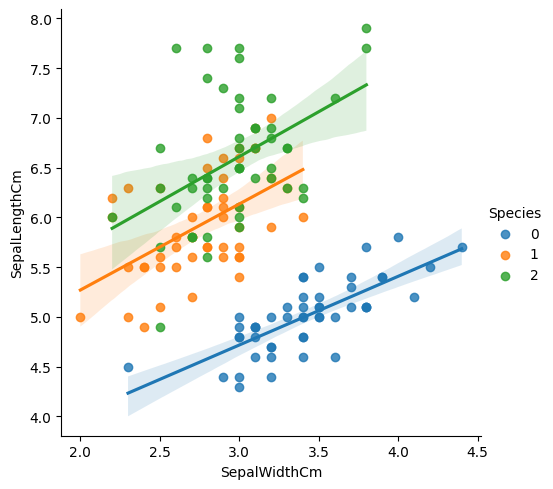

In [39]:
sns.lmplot(x='SepalWidthCm', y='SepalLengthCm', hue='Species', data=df)


## 9. How does Petal Length correlate with Sepal Width for the entire dataset?

<Axes: xlabel='PetalLengthCm', ylabel='SepalWidthCm'>

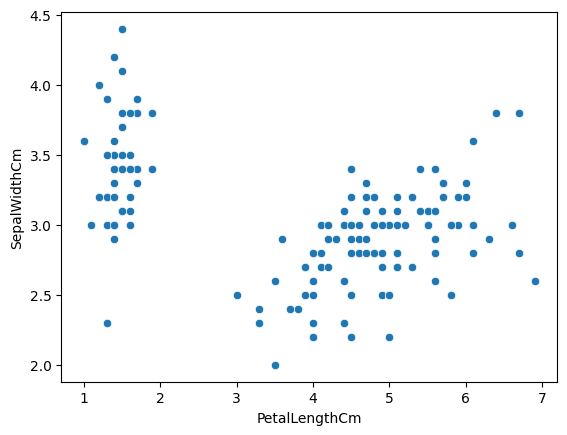

In [40]:
sns.scatterplot(x='PetalLengthCm', y='SepalWidthCm', data=df)


## 10. Investigate the relationship between Petal Width and Sepal Length, distinguishing species.

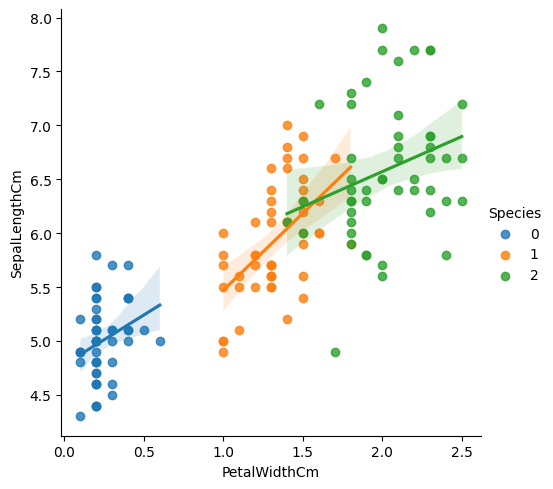

In [41]:
sns.lmplot(x='PetalWidthCm', y='SepalLengthCm', hue='Species', data=df)


## MULTIVARIATE ANALYSIS

## 1. How does Sepal Length correlate with Sepal Width for all samples?

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

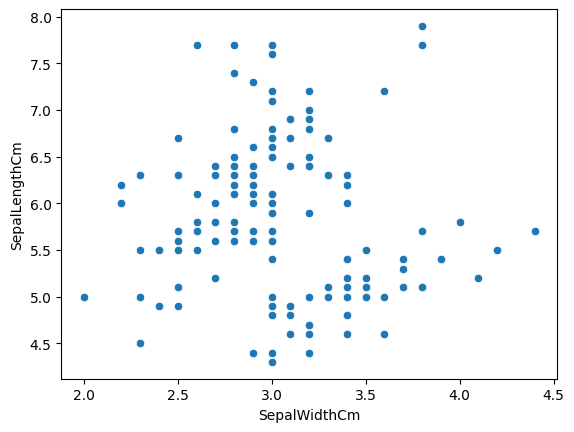

In [42]:
sns.scatterplot(x='SepalWidthCm', y='SepalLengthCm', data=df)


## 2. Investigate the correlation between Petal Length and Petal Width across different species.

<Axes: xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

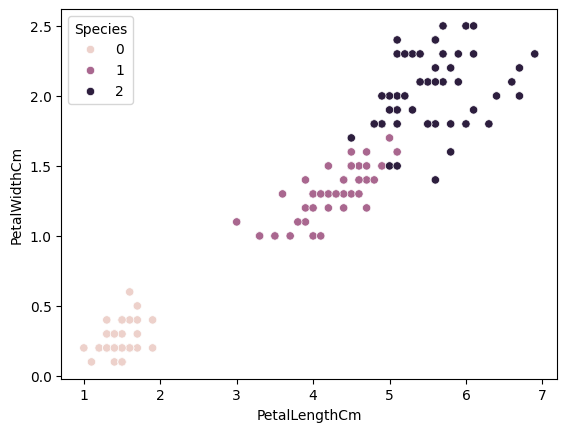

In [43]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=df)


## 3. Explore the relationship between Sepal Length and Petal Length for Iris setosa.

<Axes: >

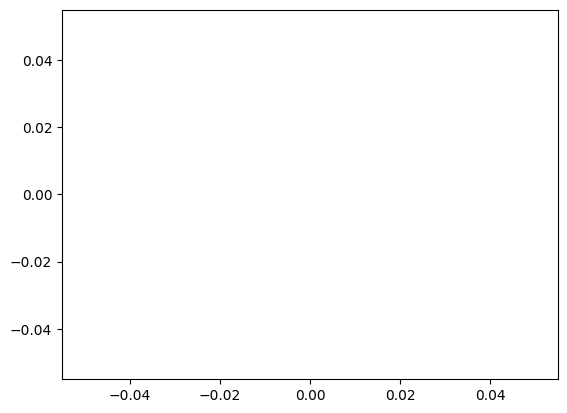

In [44]:
setosa_data = df[df['Species'] == 'Iris-setosa']
sns.scatterplot(x='SepalLengthCm', y='PetalLengthCm', data=setosa_data)


## 4. How does Petal Width vary with Sepal Width for Iris versicolor?

<Axes: >

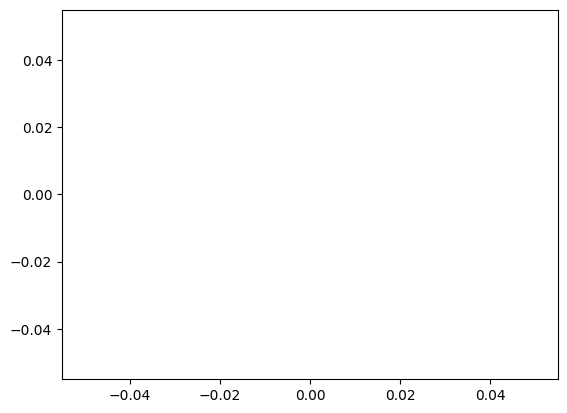

In [45]:
versicolor_data = df[df['Species'] == 'Iris-versicolor']
sns.scatterplot(x='SepalWidthCm', y='PetalWidthCm', data=versicolor_data)


## 5.  Investigate the correlation between Sepal Length and Petal Width for Iris virginica.

<Axes: >

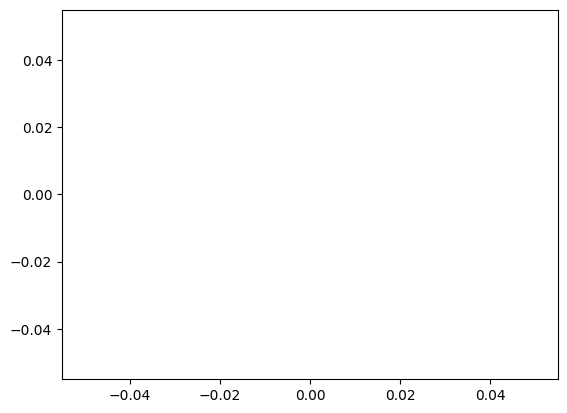

In [46]:
virginica_data = df[df['Species'] == 'Iris-virginica']
sns.scatterplot(x='PetalWidthCm', y='SepalLengthCm', data=virginica_data)


## 6. Plotting histogram for all the features together


<Axes: >

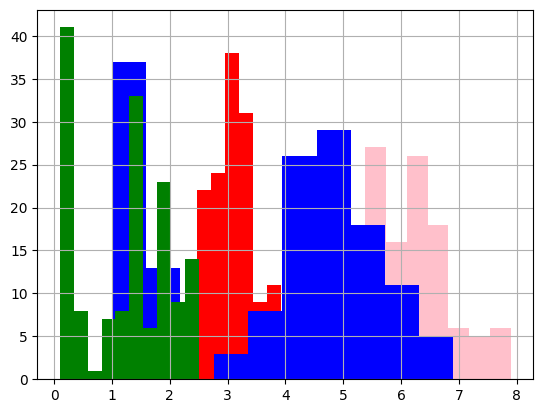

In [47]:
df['SepalLengthCm'].hist(color='pink')
df['SepalWidthCm'].hist(color='red')
df['PetalLengthCm'].hist(color='blue')
df['PetalWidthCm'].hist(color='green')

## 7. Pairplot without specifying hue

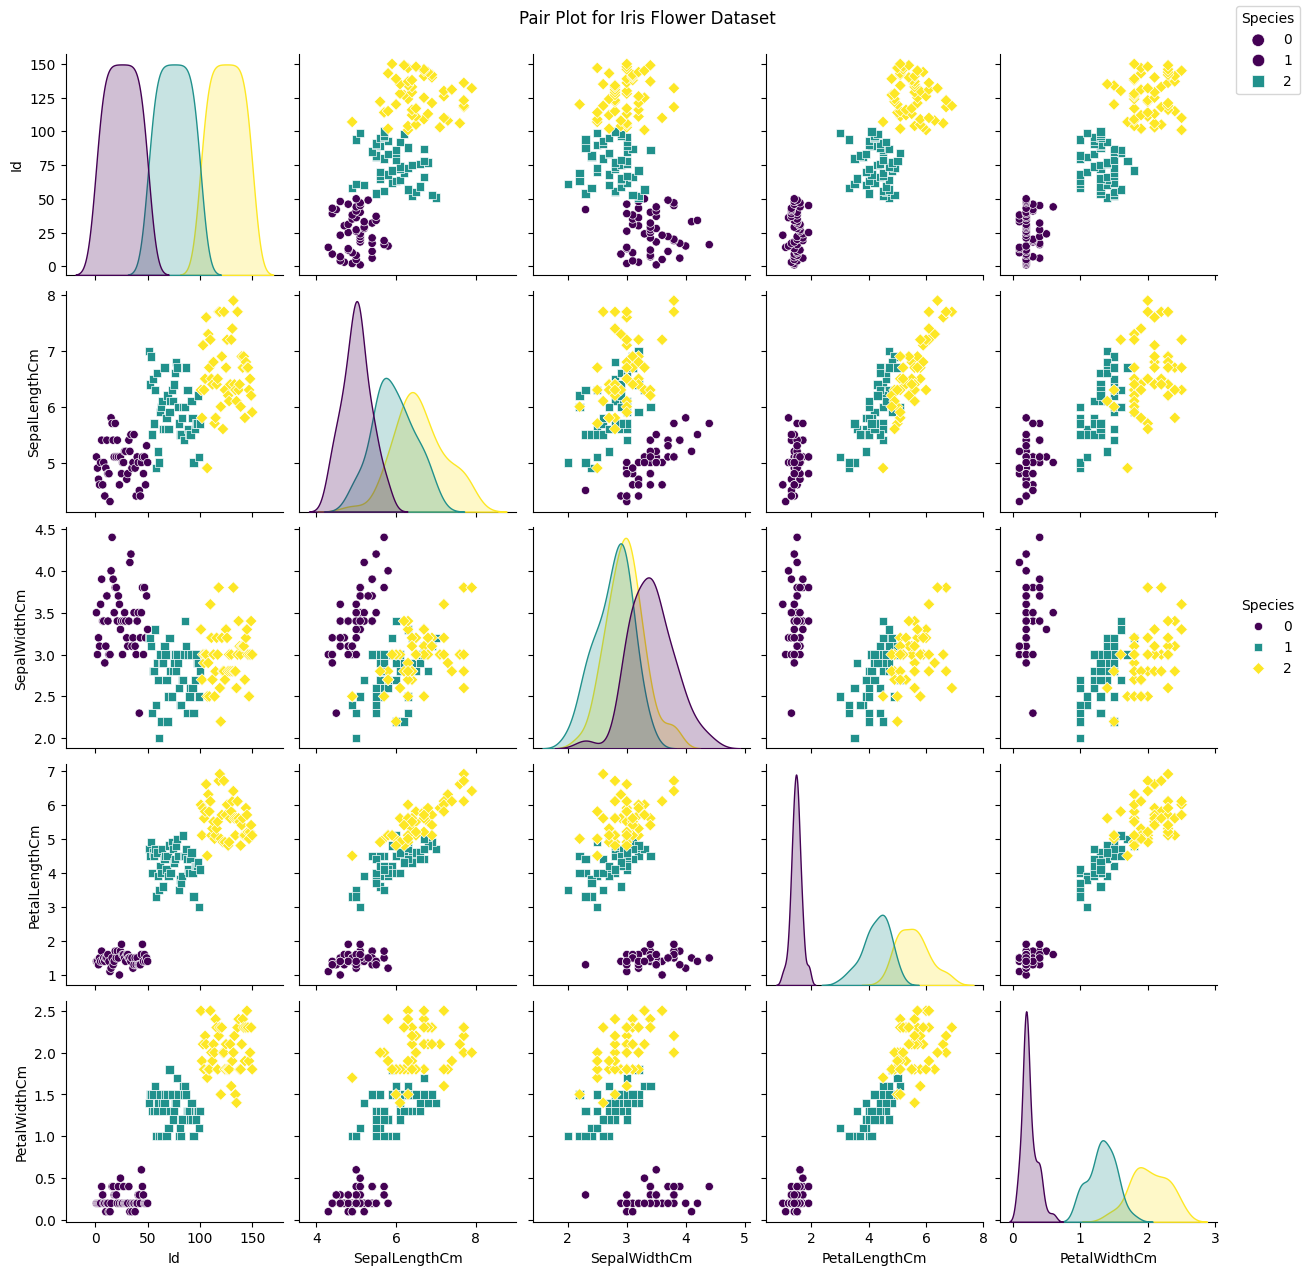

In [48]:
# Use seaborn's pairplot with hue to specify different colors for each species
pair_plot = sns.pairplot(df, hue='Species', markers=['o', 's', 'D'], palette='viridis')

# Customize the legend to represent species
pair_plot.fig.legend(df['Species'].unique(), markerscale=1.5, title='Species')

# Add a title to the pair plot
plt.suptitle('Pair Plot for Iris Flower Dataset', y=1.02)

# Show the plot
plt.show()


## 8. Correlation Matrix

In [49]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

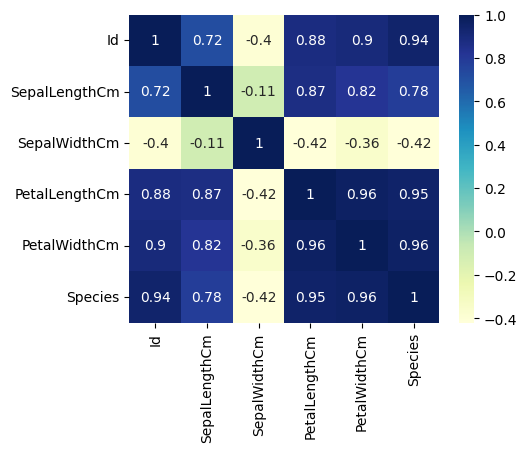

In [50]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='YlGnBu')

## DATA PREPARATION FOR PREDICTIVE MODELING

In [51]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40)

In [52]:
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [53]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

## NAIVE BAYES

In [54]:
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB()
model1.fit(x_train, y_train)
accuracy_1 = model1.score(x_test, y_test) * 100
print("Accuracy (Naive Bayes): ", accuracy_1)


Accuracy (Naive Bayes):  98.33333333333333


## K-NEAREST NEIGHBOURS (KNN)

In [55]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
accuracy_2 =  model2.score(x_test, y_test) * 100
print("Accuracy (KNN): ", accuracy_2)

Accuracy (KNN):  96.66666666666667


## DECISION TREE

In [56]:

from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(x_train,y_train)
accuracy_3 = model3.score(x_test,y_test)
print("Accuracy of Decision Tree: ", accuracy_3*100)

Accuracy of Decision Tree:  96.66666666666667


## CONFUSION MATRIX

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)

In [59]:
conf_matrix1 = confusion_matrix(y_test, y_pred1)
conf_matrix2 = confusion_matrix(y_test, y_pred2)
conf_matrix3 = confusion_matrix(y_test, y_pred3)


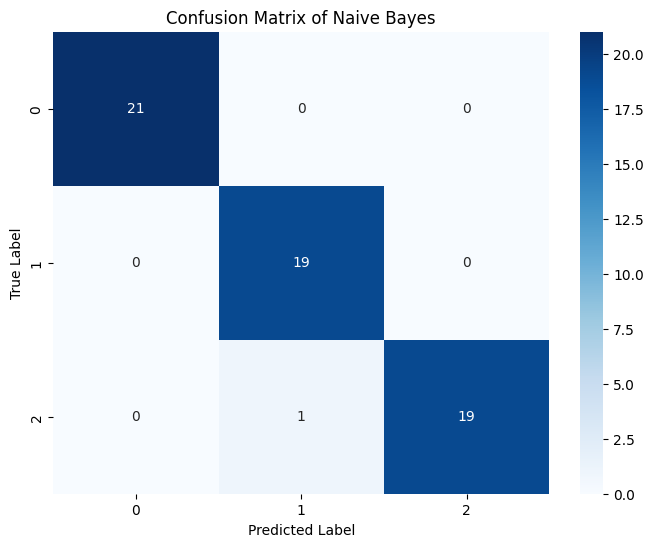

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Naive Bayes')
plt.show()

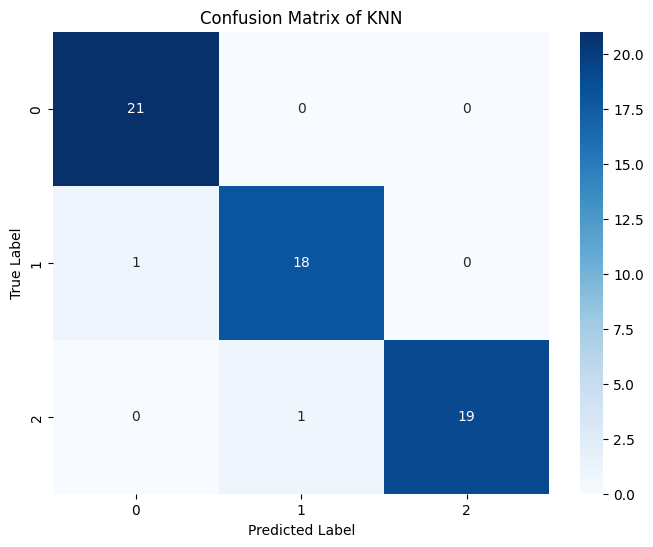

In [61]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of KNN')
plt.show()

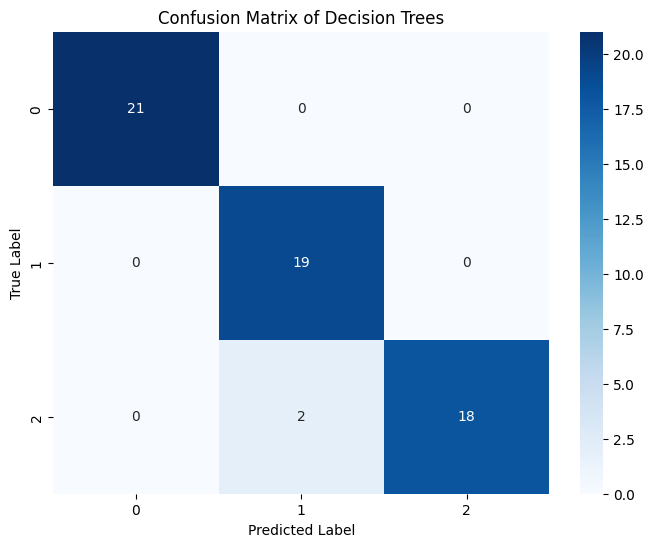

In [62]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of Decision Trees')
plt.show()

## Model Comparison - Visualization

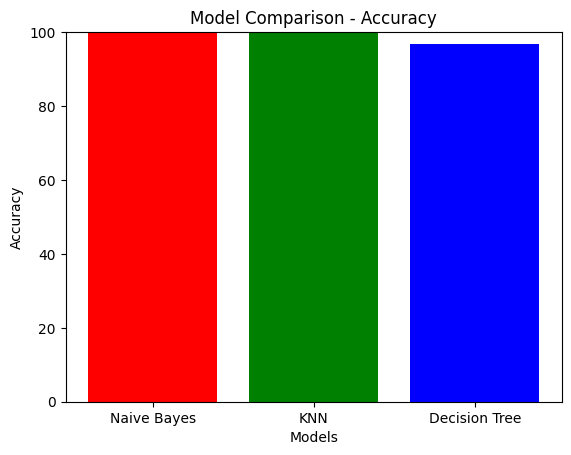

In [63]:
# Model Comparison - Visualization
models = ['Naive Bayes', 'KNN', 'Decision Tree']
accuracies = [accuracy_1*100, accuracy_2*100, accuracy_3*100]
plt.bar(models, accuracies, color=['Red', 'Green', 'Blue'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison - Accuracy")
plt.ylim([0, 100])
plt.show()